### data-set source --

https://raw.githubusercontent.com/upxacademy/ML_with_Python/master/Datasets/bikeshare.csv

    
datetime - hourly date + timestamp<br/>
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter <br/>
holiday - whether the day is considered a holiday<br/>
workingday - whether the day is neither a weekend nor holiday<br/>
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br/>
temp - temperature in Celsius<br/>
atemp - "feels like" temperature in Celsius<br/>
humidity - relative humidity<br/>
windspeed - wind speed<br/>
casual - number of non-registered user rentals initiated<br/>
registered - number of registered user rentals initiated<br/>
count - number of total rentals<br/>

In [1]:
import numpy as np
import pandas as pd

In [14]:
bike_data = pd.read_csv('bikeshare.csv')

In [15]:
bike_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [16]:
bike_data = bike_data.set_index('datetime') ## using index as date-hour instead of default numeric index
bike_data.rename(columns ={'count':'total'}, inplace=True) ## rename column to easy understand
bike_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [17]:
bike_data.shape ## shape of data-set

(10886, 11)

#### data-set having 11 columns and 10886 sample records 

### checking if data-set is having any null data 

In [19]:
bike_data.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
total         0
dtype: int64

In [20]:
bike_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [21]:
bike_data_corr = bike_data.corr()
bike_data_corr

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


## Visualization

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

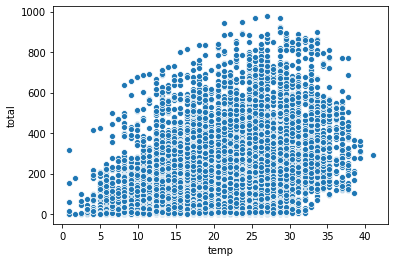

In [38]:
sns.scatterplot('temp','total', data = bike_data)
plt.show()

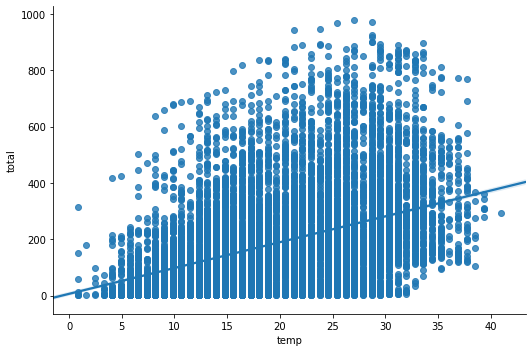

In [39]:
sns.lmplot(x='temp', y='total', data=bike_data,aspect=1.5 ,scatter={'alpha':0.3})
plt.show()

In [ ]:
bike_data.plot.bar(x='temp',y='total')
plt.show()

## Building a Linear regression model to predict number of bikes rented in an hour

In [40]:
from sklearn.linear_model import LinearRegression

In [44]:
feature_col = ['temp'] ## input-variable/predictor
X = bike_data[feature_col]
# print('input data-set\n', X.head())
print(X.head())

                     temp
datetime                 
2011-01-01 00:00:00  9.84
2011-01-01 01:00:00  9.02
2011-01-01 02:00:00  9.02
2011-01-01 03:00:00  9.84
2011-01-01 04:00:00  9.84


In [45]:
y= bike_data.total ## Output variable
y.head()

datetime
2011-01-01 00:00:00    16
2011-01-01 01:00:00    40
2011-01-01 02:00:00    32
2011-01-01 03:00:00    13
2011-01-01 04:00:00     1
Name: total, dtype: int64

In [46]:
linearregression = LinearRegression()


In [48]:
linearregression.fit(X,y)
print('coeficient value::',linearregression.coef_) ## 
print('intercept  value :', linearregression.intercept_)

coeficient value:: [9.17054048]
intercept  value : 6.046212959616781
